___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

<h1><p style="text-align: center;">Data Analysis with Python <br>Project - 1</p><h1> - Traffic Police Stops <img src="https://docs.google.com/uc?id=17CPCwi3_VvzcS87TOsh4_U8eExOhL6Ki" class="img-fluid" alt="CLRSWY" width="200" height="100"> 

Does the ``gender`` of a driver have an impact on police behavior during a traffic stop? **In this chapter**, you will explore that question while practicing filtering, grouping, method chaining, Boolean math, string methods, and more!

***

## Examining traffic violations

Before comparing the violations being committed by each gender, you should examine the ``violations`` committed by all drivers to get a baseline understanding of the data.

In this exercise, you'll count the unique values in the ``violation`` column, and then separately express those counts as proportions.

> Before starting your work in this section **repeat the steps which you did in the previos chapter for preparing the data.** Continue to this chapter based on where you were in the end of the previous chapter.

In [1]:
import pandas as pd
from collections import Counter
ri = pd.read_csv("police.csv_1.jptr sonu.csv", index_col =0)

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
ri

,id,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,Zone K1,600,M,1985.0,20.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
2005-01-02 20:30:00,RI-2005-00002,Zone X4,500,M,1987.0,18.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2005-01-04 12:55:00,RI-2005-00004,Zone X4,500,M,1986.0,19.0,W,White,Equipment/Inspection Violation,Equipment,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-01-06 01:30:00,RI-2005-00005,Zone X4,500,M,1978.0,27.0,B,Black,Equipment/Inspection Violation,Equipment,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-01-12 08:05:00,RI-2005-00006,Zone X1,0,M,1973.0,32.0,B,Black,Call for Service,Other,False,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006-08-08 22:45:00,RI-2006-35917,Zone K3,300,M,1973.0,33.0,B,Black,Equipment/Inspection Violation,Equipment,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K3
2006-08-08 22:45:00,RI-2006-35918,Zone K3,300,F,1971.0,35.0,B,Black,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,True,False,Zone K3
2006-08-08 22:53:00,RI-2006-35919,Zone X4,500,M,1952.0,54.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,16-30 Min,True,False,Zone X4


**INSTRUCTIONS**

*   Count the unique values in the ``violation`` column, to see what violations are being committed by all drivers.
*   Express the violation counts as proportions of the total.

In [3]:
ri["violation"].shape

(48010,)

In [4]:
ri["violation"].isnull().sum()

0

In [5]:
ri["violation"].value_counts(dropna =False)

Speeding               36111
Moving violation        6522
Equipment               3022
Registration/plates     1463
Other                    892
Name: violation, dtype: int64

In [6]:
ri.violation.value_counts(normalize =True) * 100

Speeding               75.215580
Moving violation       13.584670
Equipment               6.294522
Registration/plates     3.047282
Other                   1.857946
Name: violation, dtype: float64

In [7]:
aa = ri["violation"].value_counts(dropna=True)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DFE08944C8>],
      dtype=object)

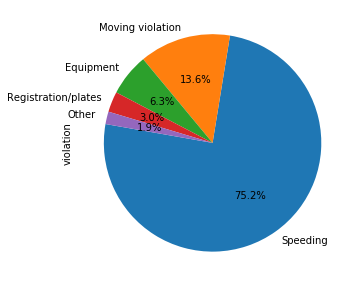

In [8]:
aa.plot.pie(y = "mass", subplots=True,figsize=(5, 5), autopct='%1.1f%%',startangle=170)

***

## Comparing violations by gender

The question we're trying to answer is whether male and female drivers tend to commit different types of traffic violations.

You'll first create a ``DataFrame`` for each gender, and then analyze the ``violations`` in each ``DataFrame`` separately.

**INSTRUCTIONS**

*   Create a ``DataFrame``, female, that only contains rows in which ``driver_gender`` is ``'F'``.
*   Create a ``DataFrame``, male, that only contains rows in which ``driver_gender`` is ``'M'``.
*   Count the ``violations`` committed by female drivers and express them as proportions.
*   Count the violations committed by male drivers and express them as proportions.

In [9]:
ri.head()

,id,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,Zone K1,600,M,1985.0,20.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
2005-01-02 20:30:00,RI-2005-00002,Zone X4,500,M,1987.0,18.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2005-01-04 12:55:00,RI-2005-00004,Zone X4,500,M,1986.0,19.0,W,White,Equipment/Inspection Violation,Equipment,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-01-06 01:30:00,RI-2005-00005,Zone X4,500,M,1978.0,27.0,B,Black,Equipment/Inspection Violation,Equipment,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-01-12 08:05:00,RI-2005-00006,Zone X1,0,M,1973.0,32.0,B,Black,Call for Service,Other,False,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1


In [10]:
female= ri[ri["driver_gender"] == "F"]


In [11]:
male = ri[ri["driver_gender"] == "M"]

In [12]:
Counter(female["driver_gender"])

Counter({'F': 13309})

In [13]:
Counter(male["driver_gender"])

Counter({'M': 34701})

In [14]:
Counter(ri["driver_gender"])

Counter({'M': 34701, 'F': 13309})

In [15]:
female.head()

,id,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,,,,,,,,
2005-02-24 01:20:00,RI-2005-00016,Zone X3,200,F,1983.0,22.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,True,False,Zone X3
2005-03-14 10:00:00,RI-2005-00019,Zone K3,300,F,1984.0,21.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K3
2005-03-29 23:20:00,RI-2005-00026,Zone K3,300,F,1971.0,34.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,True,False,Zone K3
2005-06-06 13:20:00,RI-2005-00035,Zone X4,500,F,1986.0,19.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-06-18 16:30:00,RI-2005-00037,Zone X4,500,F,1964.0,41.0,W,White,Other Traffic Violation,Moving violation,False,NaN,NaN,False,Arrest Driver,True,30+ Min,False,False,Zone X4


In [16]:
male.head()

,id,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,Zone K1,600,M,1985.0,20.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
2005-01-02 20:30:00,RI-2005-00002,Zone X4,500,M,1987.0,18.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2005-01-04 12:55:00,RI-2005-00004,Zone X4,500,M,1986.0,19.0,W,White,Equipment/Inspection Violation,Equipment,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-01-06 01:30:00,RI-2005-00005,Zone X4,500,M,1978.0,27.0,B,Black,Equipment/Inspection Violation,Equipment,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-01-12 08:05:00,RI-2005-00006,Zone X1,0,M,1973.0,32.0,B,Black,Call for Service,Other,False,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1


In [17]:
kadın_viplation_dagılımı = female["violation"].value_counts(normalize=True) *100
kadın_viplation_dagılımı

Speeding               81.118040
Moving violation        9.903073
Equipment               4.560824
Registration/plates     2.757532
Other                   1.660530
Name: violation, dtype: float64

In [18]:
erkek_violation_dagılım = male["violation"].value_counts(normalize = True) * 100
erkek_violation_dagılım

Speeding               72.951788
Moving violation       14.996686
Equipment               6.959454
Registration/plates     3.158410
Other                   1.933662
Name: violation, dtype: float64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DFE0A8DA88>],
      dtype=object)

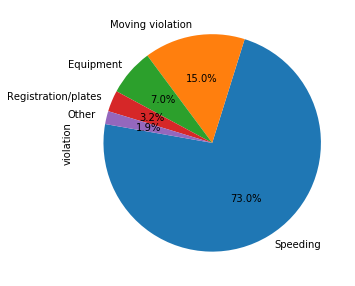

In [19]:
erkek_violation_dagılım.plot.pie(y = "mass", subplots=True,figsize=(5, 5), autopct='%1.1f%%',startangle=170)

In [20]:
ri.groupby(["driver_gender"])["violation"].value_counts(normalize = True, dropna=False)*100

driver_gender  violation          
F              Speeding               81.118040
               Moving violation        9.903073
               Equipment               4.560824
               Registration/plates     2.757532
               Other                   1.660530
M              Speeding               72.951788
               Moving violation       14.996686
               Equipment               6.959454
               Registration/plates     3.158410
               Other                   1.933662
Name: violation, dtype: float64

In [21]:
ri.groupby("violation")["driver_gender"].value_counts(normalize = True, dropna =False)*100

violation            driver_gender
Equipment            M                79.913964
                     F                20.086036
Moving violation     M                79.791475
                     F                20.208525
Other                M                75.224215
                     F                24.775785
Registration/plates  M                74.914559
                     F                25.085441
Speeding             M                70.103293
                     F                29.896707
Name: driver_gender, dtype: float64

## Comparing speeding outcomes by gender

When a driver is pulled over for speeding, many people believe that gender has an impact on whether the driver will receive a ticket or a warning. Can you find evidence of this in the dataset?

First, you'll create two ``DataFrames`` of drivers who were stopped for ``speeding``: one containing ***females*** and the other containing ***males***.

Then, for each **gender**, you'll use the ``stop_outcome`` column to calculate what percentage of stops resulted in a ``"Citation"`` (meaning a ticket) versus a ``"Warning"``.

**INSTRUCTIONS**

*   Create a ``DataFrame``, ``female_and_speeding``, that only includes female drivers who were stopped for speeding.
*   Create a ``DataFrame``, ``male_and_speeding``, that only includes male drivers who were stopped for speeding.
*   Count the **stop outcomes** for the female drivers and express them as proportions.
*   Count the **stop outcomes** for the male drivers and express them as proportions.

In [22]:
female_and_speeding=ri[(ri.driver_gender == "F") & (ri.violation == "Speeding")]

In [23]:
male_and_speeding=ri[(ri.driver_gender == "M") & (ri.violation == "Speeding")]

In [24]:
ri["stop_outcome"].value_counts(dropna =False)

Citation            43787
Arrest Driver        2268
Warning               871
N/D                   663
Arrest Passenger      220
No Action             201
Name: stop_outcome, dtype: int64

In [25]:
print(female_and_speeding.stop_outcome.value_counts(normalize = True))
print("---------------------------------")
print(male_and_speeding.stop_outcome.value_counts(normalize = True))

Citation            0.973416
Warning             0.012968
Arrest Driver       0.007410
N/D                 0.003612
Arrest Passenger    0.002316
No Action           0.000278
Name: stop_outcome, dtype: float64
---------------------------------
Citation            0.957298
Arrest Driver       0.026230
Warning             0.010666
N/D                 0.003397
Arrest Passenger    0.002015
No Action           0.000395
Name: stop_outcome, dtype: float64


In [26]:
ri.groupby(["violation", "driver_gender"])["stop_outcome"].value_counts(normalize =True)

violation            driver_gender  stop_outcome    
Equipment            F              Citation            0.650741
                                    N/D                 0.205931
                                    Arrest Driver       0.065898
                                    Warning             0.046129
                                    Arrest Passenger    0.026359
                                    No Action           0.004942
                     M              Citation            0.682402
                                    N/D                 0.133333
                                    Arrest Driver       0.117184
                                    Warning             0.050104
                                    Arrest Passenger    0.014493
                                    No Action           0.002484
Moving violation     F              Citation            0.868741
                                    Arrest Driver       0.072838
                                    W

## Calculating the search rate

During a traffic stop, the police officer sometimes conducts a search of the vehicle. In this exercise, you'll calculate the percentage of all stops that result in a vehicle search, also known as the **search rate**.

**INSTRUCTIONS**

*   Check the data type of ``search_conducted`` to confirm that it's a ``Boolean Series``.
*   Calculate the search rate by counting the ``Series`` values and expressing them as proportions.
*   Calculate the search rate by taking the mean of the ``Series``. (It should match the proportion of ``True`` values calculated above.)

In [27]:
ri.head()

,id,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
stop_datetime,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,Zone K1,600,M,1985.0,20.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K1
2005-01-02 20:30:00,RI-2005-00002,Zone X4,500,M,1987.0,18.0,W,White,Speeding,Speeding,False,NaN,NaN,False,Citation,False,16-30 Min,False,False,Zone X4
2005-01-04 12:55:00,RI-2005-00004,Zone X4,500,M,1986.0,19.0,W,White,Equipment/Inspection Violation,Equipment,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-01-06 01:30:00,RI-2005-00005,Zone X4,500,M,1978.0,27.0,B,Black,Equipment/Inspection Violation,Equipment,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4
2005-01-12 08:05:00,RI-2005-00006,Zone X1,0,M,1973.0,32.0,B,Black,Call for Service,Other,False,NaN,NaN,False,Citation,False,30+ Min,True,False,Zone X1


In [28]:
ri["search_conducted"].dtype

dtype('bool')

In [29]:
ri["search_conducted"]=ri["search_conducted"].astype(bool)

In [30]:
ri["search_conducted"].dtype

dtype('bool')

In [31]:
ri.search_conducted.value_counts(normalize =True)

False    0.958092
True     0.041908
Name: search_conducted, dtype: float64

In [32]:
ri.search_conducted.mean()

0.04190793584669861

***

## Comparing search rates by gender

You'll compare the rates at which **female** and **male** drivers are searched during a traffic stop. Remember that the vehicle search rate across all stops is about **3.8%**.

First, you'll filter the ``DataFrame`` by gender and calculate the search rate for each group separately. Then, you'll perform the same calculation for both genders at once using a ``.groupby()``.

**INSTRUCTIONS 1/3**

*   Filter the ``DataFrame`` to only include **female** drivers, and then calculate the search rate by taking the mean of ``search_conducted``.

In [33]:
ri[ri.driver_gender == "F"].search_conducted.mean() *100

1.7807498685100307

**INSTRUCTIONS 2/3**

*   Filter the ``DataFrame`` to only include **male** drivers, and then repeat the search rate calculation.

In [34]:
ri[ri.driver_gender == "M"].search_conducted.mean()

0.05115126365234431

**INSTRUCTIONS 3/3**

*   Group by driver gender to calculate the search rate for both groups simultaneously. (It should match the previous results.)

In [35]:
ri.groupby(["driver_gender"]).search_conducted.mean() 

driver_gender
F    0.017807
M    0.051151
Name: search_conducted, dtype: float64

***

## Adding a second factor to the analysis

Even though the search rate for males is much higher than for females, it's possible that the difference is mostly due to a second factor.

For example, you might hypothesize that the search rate varies by violation type, and the difference in search rate between males and females is because they tend to commit different violations.

You can test this hypothesis by examining the search rate for each combination of gender and violation. If the hypothesis was true, you would find that males and females are searched at about the same rate for each violation. Find out below if that's the case!

**INSTRUCTIONS 1/2**

*   Use a ``.groupby()`` to calculate the search rate for each combination of gender and violation. Are males and females searched at about the same rate for each violation?

In [36]:
ri.groupby(["driver_gender", "violation"]).search_conducted.mean()

driver_gender  violation          
F              Equipment              0.079077
               Moving violation       0.047800
               Other                  0.045249
               Registration/plates    0.114441
               Speeding               0.006854
M              Equipment              0.123395
               Moving violation       0.088778
               Other                  0.154993
               Registration/plates    0.171533
               Speeding               0.028560
Name: search_conducted, dtype: float64

**INSTRUCTIONS 2/2**

*   Reverse the ordering to group by violation before gender. The results may be easier to compare when presented this way.

In [37]:
ri.groupby(["violation","driver_gender"]).search_conducted.mean()

violation            driver_gender
Equipment            F                0.079077
                     M                0.123395
Moving violation     F                0.047800
                     M                0.088778
Other                F                0.045249
                     M                0.154993
Registration/plates  F                0.114441
                     M                0.171533
Speeding             F                0.006854
                     M                0.028560
Name: search_conducted, dtype: float64

***

## Counting protective frisks

During a vehicle search, the police officer may pat down the driver to check if they have a weapon. This is known as a ``"protective frisk."``

You'll first check to see how many times "Protective Frisk" was the only search type. Then, you'll use a string method to locate all instances in which the driver was frisked.

**INSTRUCTIONS**

*   Count the ``search_type`` values to see how many times ``"Protective Frisk"`` was the only search type.
*   Create a new column, frisk, that is ``True`` if ``search_type`` contains the string ``"Protective Frisk"`` and ``False`` otherwise.
*   Check the data type of frisk to confirm that it's a ``Boolean Series``.
*   Take the sum of frisk to count the total number of frisks.

In [38]:
ri["search_type"] = ri["search_type"].astype("str")

In [39]:
ri["search_type"].dtype

dtype('O')

In [40]:
bos_list=[]
for j in range(0, len(ri["search_type"])):
    a = ri["search_type"][j].split(",")
    #bos_list.append(a)
    for k in range(0,len(a)):
        bos_list.append(a[k]) 

In [41]:
counter= Counter(bos_list)

In [42]:
counter

Counter({'nan': 45998,
         'Probable Cause': 431,
         'Protective Frisk': 403,
         'Incident to Arrest': 1293,
         'Reasonable Suspicion': 85,
         'Inventory': 328})

In [43]:
print(counter["Protective Frisk"])

403


In [44]:
index =[]
for i in range(0, len(ri["search_type"])):
    if "Protective Frisk" in ri["search_type"][i]:
        index.append(i)
    

In [45]:
index[:5]

[9, 77, 236, 997, 1088]

In [46]:
len(index)

403

In [47]:
ri["frisk"]=False

In [48]:
for i in index:
    ri["frisk"][i] = True 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [49]:
ri["frisk"][1120]

False

In [50]:
ri["search_type"][1120]

'nan'

In [51]:
ri["frisk"].dtype

dtype('bool')

In [52]:
sum(ri["frisk"])

403

***

## Comparing frisk rates by gender

You'll compare the rates at which female and male drivers are frisked during a search. Are males frisked more often than females, perhaps because police officers consider them to be higher risk?

Before doing any calculations, it's important to filter the ``DataFrame`` to only include the relevant subset of data, namely stops in which a search was conducted.

**INSTRUCTIONS**

*   Create a ``DataFrame``, searched, that only contains rows in which ``search_conducted`` is ``True``.
*   Take the mean of the frisk column to find out what percentage of searches included a frisk.
*   Calculate the frisk rate for each gender using a ``.groupby()``.

In [53]:
ri[ri.search_conducted==True]# search_counted true olanlar

,id,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,...,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,frisk
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-24 20:32:00,RI-2005-00010,Zone K1,600,M,1987.0,18.0,W,White,Speeding,Speeding,...,Probable Cause,Probable Cause,True,Citation,False,0-15 Min,True,True,Zone K1,False
2005-02-09 03:05:00,RI-2005-00011,Zone X4,500,M,1976.0,29.0,W,White,Registration Violation,Registration/plates,...,"Probable Cause,Terry Frisk","Probable Cause,Protective Frisk",False,Citation,False,0-15 Min,False,False,Zone X4,True
2005-08-28 01:00:00,RI-2005-00084,Zone X1,0,M,1979.0,26.0,W,White,Other Traffic Violation,Moving violation,...,"Incident to Arrest,Terry Frisk","Incident to Arrest,Protective Frisk",False,Arrest Driver,True,16-30 Min,True,False,Zone X1,True
2005-09-15 02:20:00,RI-2005-00094,Zone X4,500,M,1988.0,17.0,W,White,Other Traffic Violation,Moving violation,...,Incident to Arrest,Incident to Arrest,False,Arrest Driver,True,16-30 Min,False,False,Zone X4,False
2005-09-24 02:20:00,RI-2005-00115,Zone K3,300,M,1987.0,18.0,W,White,Other Traffic Violation,Moving violation,...,Incident to Arrest,Incident to Arrest,False,Arrest Driver,True,16-30 Min,False,False,Zone K3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006-08-07 23:40:00,RI-2006-35738,Zone X3,200,F,1984.0,22.0,W,White,Call for Service,Other,...,Incident to Arrest,Incident to Arrest,False,Arrest Driver,True,16-30 Min,False,False,Zone X3,False
2006-08-08 00:15:00,RI-2006-35744,Zone K3,300,M,1971.0,35.0,W,White,Other Traffic Violation,Moving violation,...,"Probable Cause,Terry Frisk","Probable Cause,Protective Frisk",True,Citation,False,16-30 Min,False,True,Zone K3,True
2006-08-08 00:15:00,RI-2006-35745,Zone X4,500,M,1971.0,35.0,W,White,Speeding,Speeding,...,"Probable Cause,Terry Frisk","Probable Cause,Protective Frisk",True,Citation,False,16-30 Min,False,True,Zone X4,True


In [54]:
ri[ri.search_conducted==True].frisk # search_counted true olanlar dan friskin icindekiler 

stop_datetime
2005-01-24 20:32:00    False
2005-02-09 03:05:00     True
2005-08-28 01:00:00     True
2005-09-15 02:20:00    False
2005-09-24 02:20:00    False
                       ...  
2006-08-07 23:40:00    False
2006-08-08 00:15:00     True
2006-08-08 00:15:00     True
2006-08-08 00:40:00    False
2006-08-08 22:22:00     True
Name: frisk, Length: 2012, dtype: bool

In [55]:
Counter(ri.search_conducted==True)# aranan insan sayısı

Counter({False: 45998, True: 2012})

In [56]:
Counter(ri[ri.search_conducted==True].frisk) #aranıp ta s,lah tasıyanların icindeki dagılım

Counter({False: 1609, True: 403})

In [57]:
frisk_True = ri[ri.search_conducted==True].groupby("driver_gender")[["frisk"]].sum() #true ları yani silahlı sayısını toplar
frisk_True

,frisk
driver_gender,
F,39.0
M,364.0


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DFE272DD88>],
      dtype=object)

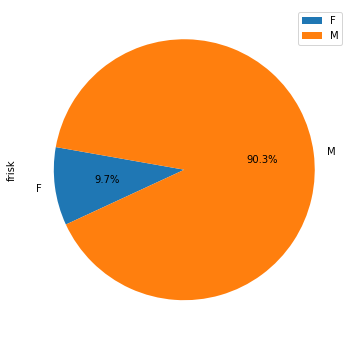

In [58]:
frisk_True.plot.pie(subplots=True,figsize=(11, 6), autopct='%1.1f%%',startangle=170)

In [59]:
# frisk True olanlar yani silah tasıyanların dagılımı.(arama yapılıp ta silah bulunan surucular)

In [60]:
aranan_insan_sayısı = ri[ri.search_conducted==True].groupby("driver_gender")[["driver_gender"]].count()
aranan_insan_sayısı

,driver_gender
driver_gender,
F,237
M,1775


In [61]:
arama_yapılan_silah_bulundurma_oranı=ri[ri.search_conducted==True].groupby("frisk")[["driver_gender"]].count()
arama_yapılan_silah_bulundurma_oranı

,driver_gender
frisk,
False,1609
True,403


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001DFE278E348>],
      dtype=object)

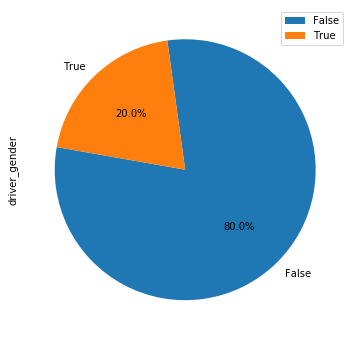

In [62]:
arama_yapılan_silah_bulundurma_oranı.plot.pie(subplots=True,figsize=(11, 6), autopct='%1.1f%%',startangle=170)

In [63]:
# arama yapılan insanların % 9 u nda silah cıkmıs

In [64]:
pwd

'C:\\Users\\BİLGİSAYAR\\My works with Python\\Git_Hup\\data_science_course-2020\\data_science_course-2020\\1-projects\\01-EU_DS_DAPy_M1-(TrafficPoliceStops)'

In [65]:
ri

,id,location_raw,police_department,driver_gender,driver_age_raw,driver_age,driver_race_raw,driver_race,violation_raw,violation,...,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,frisk
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2005-01-02 01:55:00,RI-2005-00001,Zone K1,600,M,1985.0,20.0,W,White,Speeding,Speeding,...,NaN,nan,False,Citation,False,0-15 Min,False,False,Zone K1,False
2005-01-02 20:30:00,RI-2005-00002,Zone X4,500,M,1987.0,18.0,W,White,Speeding,Speeding,...,NaN,nan,False,Citation,False,16-30 Min,False,False,Zone X4,False
2005-01-04 12:55:00,RI-2005-00004,Zone X4,500,M,1986.0,19.0,W,White,Equipment/Inspection Violation,Equipment,...,NaN,nan,False,Citation,False,0-15 Min,False,False,Zone X4,False
2005-01-06 01:30:00,RI-2005-00005,Zone X4,500,M,1978.0,27.0,B,Black,Equipment/Inspection Violation,Equipment,...,NaN,nan,False,Citation,False,0-15 Min,False,False,Zone X4,False
2005-01-12 08:05:00,RI-2005-00006,Zone X1,0,M,1973.0,32.0,B,Black,Call for Service,Other,...,NaN,nan,False,Citation,False,30+ Min,True,False,Zone X1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006-08-08 22:45:00,RI-2006-35917,Zone K3,300,M,1973.0,33.0,B,Black,Equipment/Inspection Violation,Equipment,...,NaN,nan,False,Citation,False,0-15 Min,False,False,Zone K3,False
2006-08-08 22:45:00,RI-2006-35918,Zone K3,300,F,1971.0,35.0,B,Black,Speeding,Speeding,...,NaN,nan,False,Citation,False,0-15 Min,True,False,Zone K3,False
2006-08-08 22:53:00,RI-2006-35919,Zone X4,500,M,1952.0,54.0,W,White,Speeding,Speeding,...,NaN,nan,False,Citation,False,16-30 Min,True,False,Zone X4,False


In [66]:
ri.to_csv("police.csv_2.jptr sonu.csv")